<a href="https://colab.research.google.com/github/mxmrsn/colab/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Object Detection on a Custom Dataset

---


## Start

In [1]:
!nvidia-smi

Wed Mar  8 18:21:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    21W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [5]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


  0%|          | 0.00/104k [00:00<?, ?B/s]

In [6]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [7]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [8]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Preparing a custom dataset

Building a custom dataset can be a painful process, but can be done using annotation tools provided by Roboflow. After creating the dataset, we can use a generated API key and project name in roboflow to download the dataset in the format used for training and testing yolov8.

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Tmp20ymWmKJOAMlc68WY")
project = rf.workspace("mxmrsn").project("hockey-ewupw")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Hockey-1 in yolov8:: 100%|██████████| 152/152 [00:00<00:00, 2066.90it/s]


## Custom Training

In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=120 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hockey-1/data.yaml, epochs=120, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [26]:
!ls {HOME}/runs/detect/train6/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1678304435.7bbefca1576d.28084.0  train_batch2.jpg
F1_curve.png					     train_batch440.jpg
P_curve.png					     train_batch441.jpg
PR_curve.png					     train_batch442.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


/content


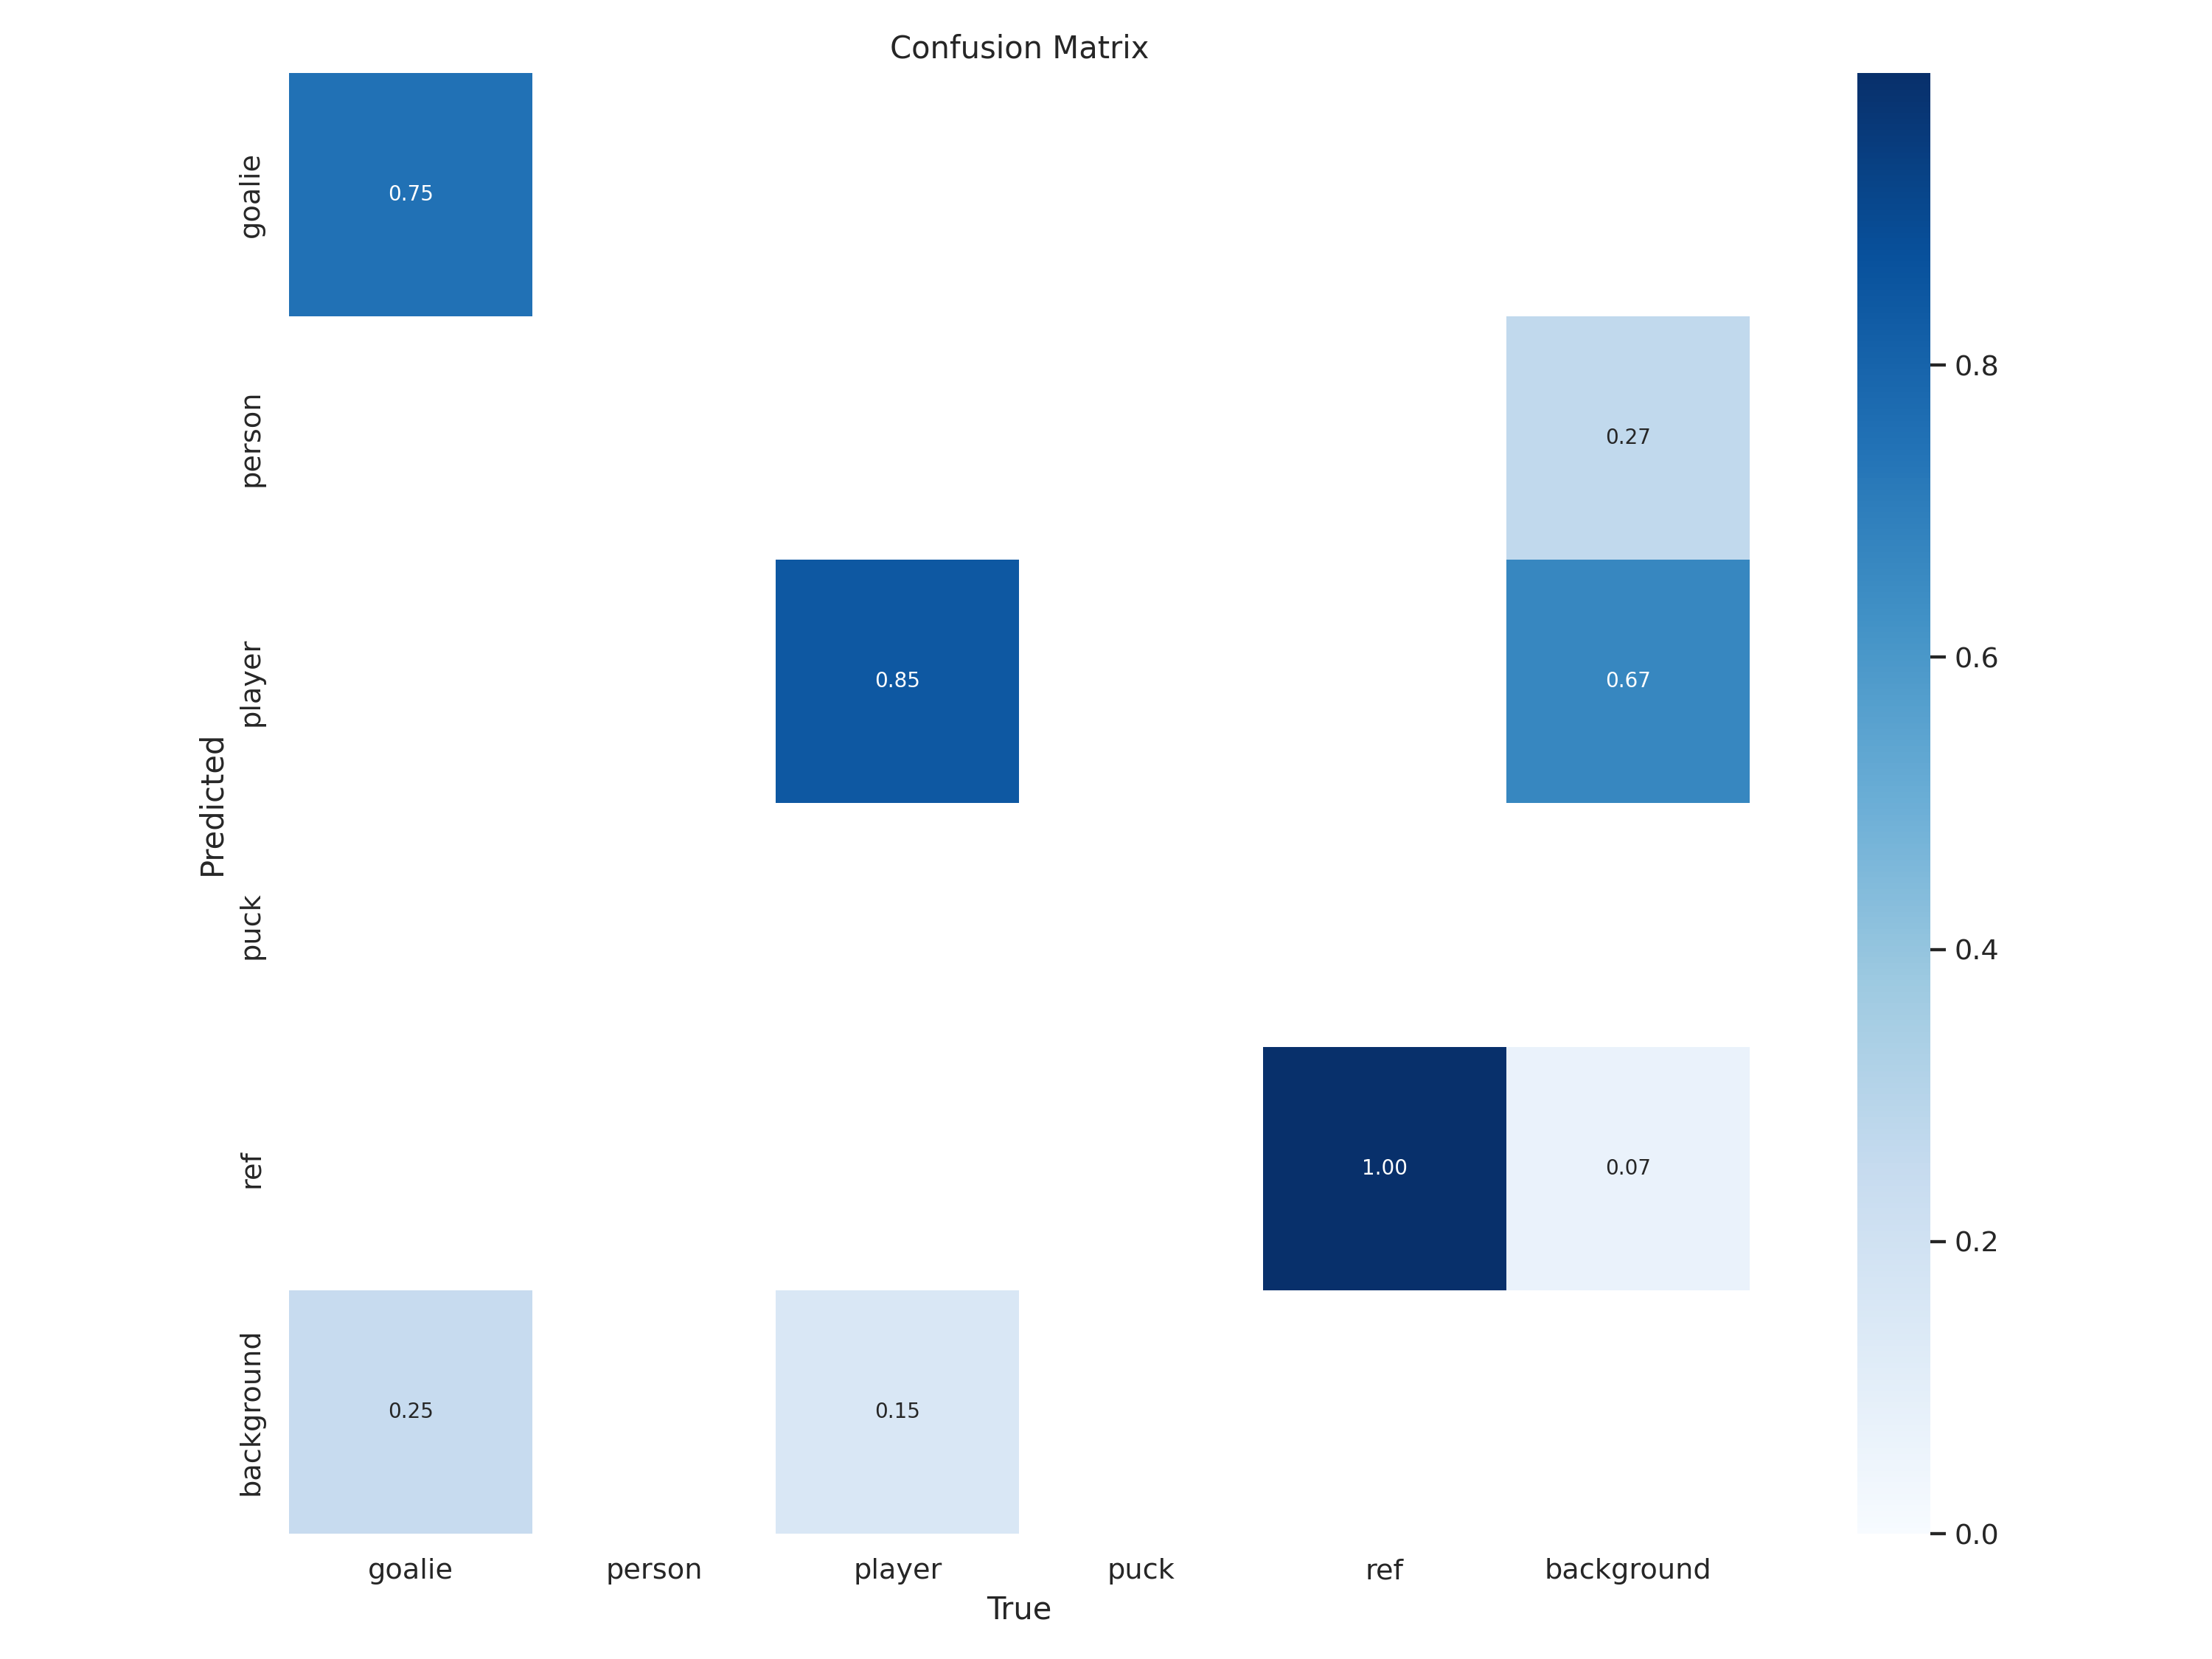

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


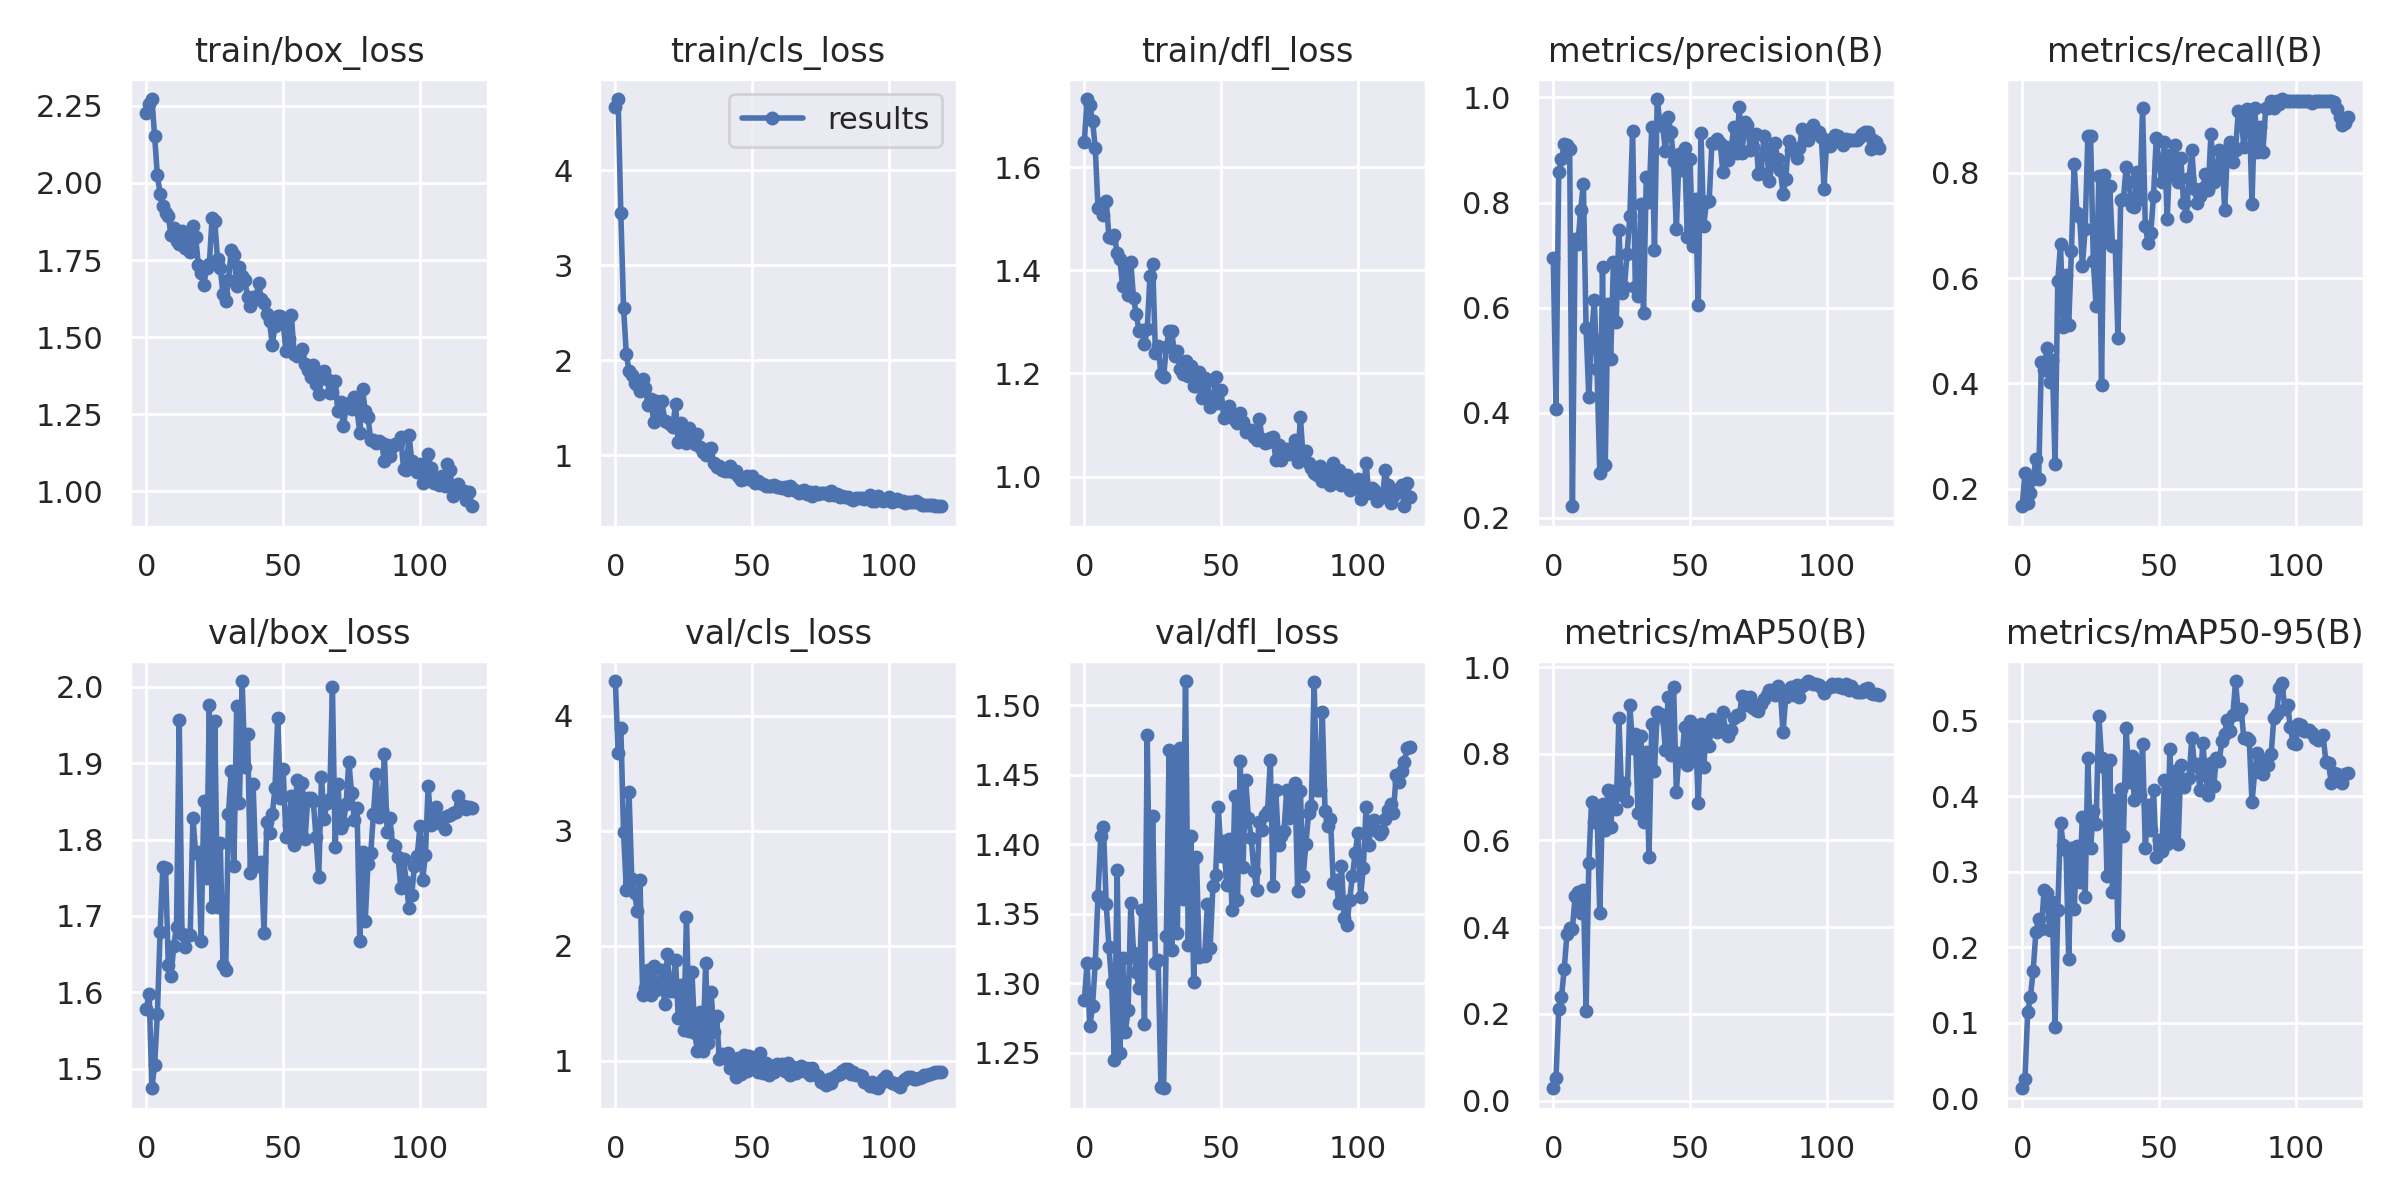

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=1000)

/content


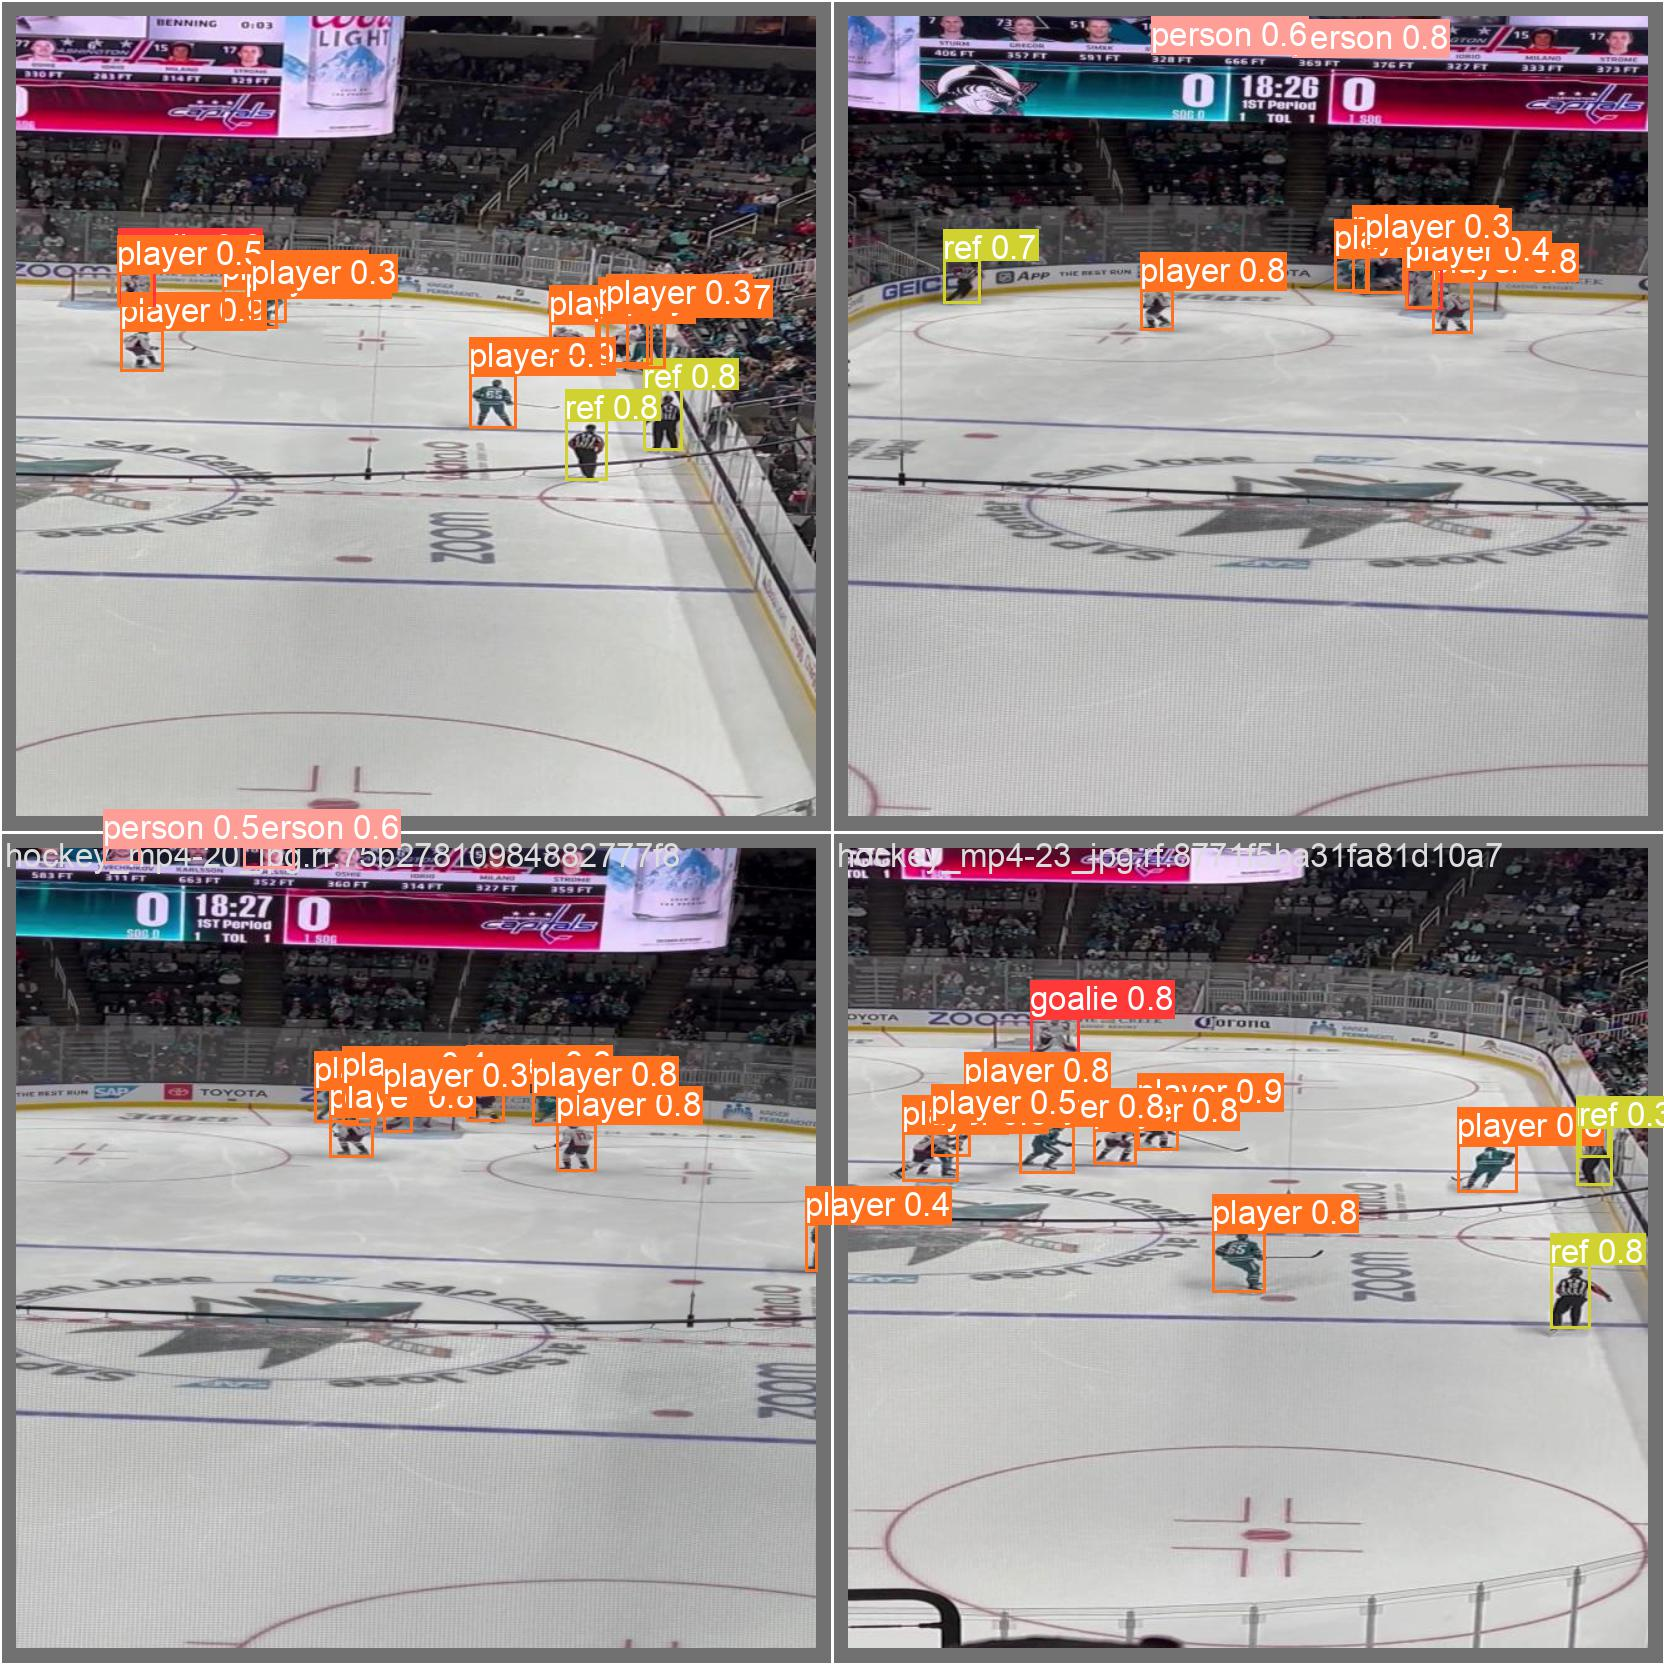

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [32]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hockey-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.96it/s]
                   all          4         35      0.902      0.843      0.935      0.552
                goalie          4          4          1      0.721      0.945      0.723
                player          4         26      0.821      0.808      0.865      0.449
                   ref          4          5      0.885          1      0.995      0.483
Speed: 0.4ms pre-process, 23.4ms inference, 0.0ms loss, 1.1ms post-process per image


## Inference with Custom Model

In [33]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/3 /content/datasets/Hockey-1/test/images/hockey_mp4-26_jpg.rf.5b1c1258d008a22e5950af9dcc9ccd9b.jpg: 800x800 1 person, 12 players, 1 ref, 26.1ms
image 2/3 /content/datasets/Hockey-1/test/images/hockey_mp4-6_jpg.rf.92730f47f900f00cbdd94e754a1f7c90.jpg: 800x800 7 players, 2 refs, 26.2ms
image 3/3 /content/datasets/Hockey-1/test/images/hockey_mp4-8_jpg.rf.2d3412d3a6c6c651f3441307227236f6.jpg: 800x800 1 goalie, 10 players, 1 ref, 26.9ms
Speed: 0.7ms pre-process, 26.4ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


**NOTE:** Let's take a look at few results.

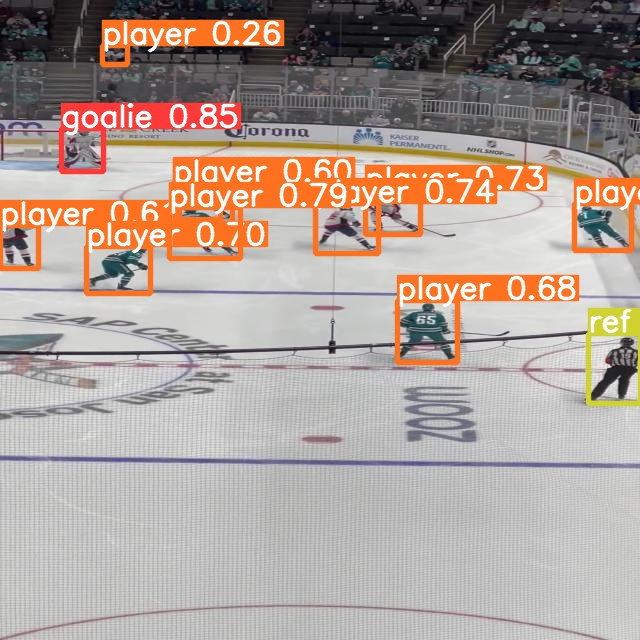

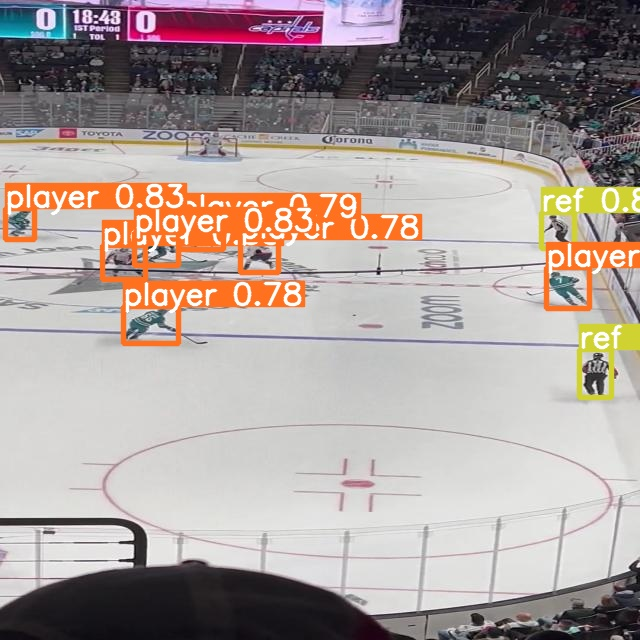

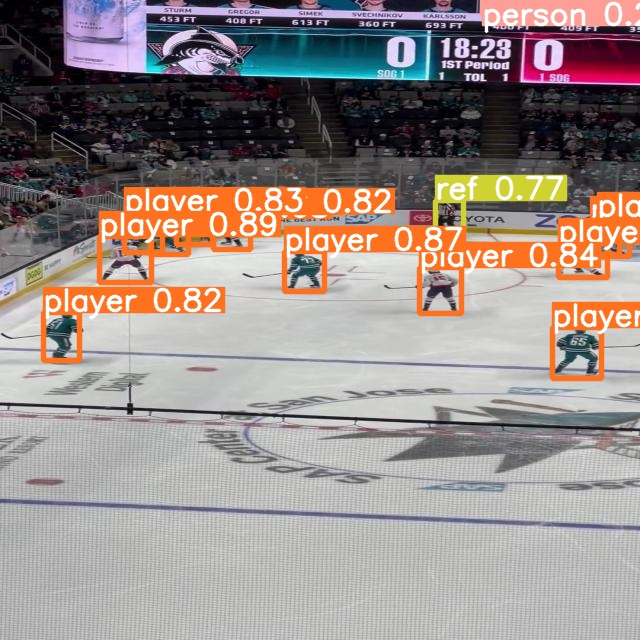

In [34]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

Save the ```best.pt``` weights and use this for inference with the YOLO model instance.